In [5]:
#import important libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CREATE SYMBOL LIST

In [6]:
#this is the special char list
symbols = ['~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/']


In [7]:
df=pd.read_excel('/Users/skbadu/OneDrive/epgm/capstone/data/Customer Churn Data.xlsx',sheet_name='Data for DSBA',na_values=symbols)

In [60]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


# STEMMING "GENDER" AND "ACOUNT_SEGMENT"

In [61]:
df['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [8]:
df["Gender"] = df["Gender"].map({
    "Male": "Male",
    "male": "Male",
    "m": "Male",
    "m ": "Male",
    "MALE": "Male",
    "M ":"Male",
    "F": "Female",
    "F ": "Female",
    "f": "Female",
    "f ": "Female",
    "female": "Female",
    "FEMALE": "Female"
})

In [63]:
df["account_segment"] = df["account_segment"].map({
    "Regular Plus": "Regular Plus",
    "Regular +": "Regular Plus",
    "Regular": "Regular",
    "Super Plus": "Super Plus",
    "Super + ": "Super Plus",
    "Super": "Super",
    "HNI": "HNI"
})

In [64]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()

# OUTLIER ANALYSIS &TREATMENT

## Tenure

/Users/skbadu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

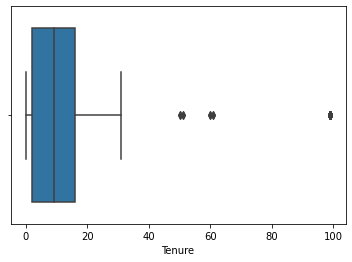

In [65]:
#USING BOX PLOT
import matplotlib.pyplot as plt
sns.boxplot(df1['Tenure'])

In [66]:
df_tenure=df1['Tenure'].dropna()

In [67]:
Q1_tenure = np.percentile(df_tenure, 25,
                   interpolation = 'midpoint')
 
Q3_tenure = np.percentile(df_tenure, 75,
                   interpolation = 'midpoint')
IQR_tenure = Q3_tenure - Q1_tenure

In [68]:
#Upper Bound
upper_tenure = (Q3_tenure+1.5*IQR_tenure)

In [69]:
#lower Bound
lower_tenure = (Q1_tenure-1.5*IQR_tenure)

## CC_Contacted_LY

/Users/skbadu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CC_Contacted_LY'>

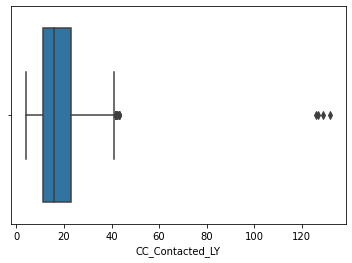

In [70]:
#USING BOX PLOT
import matplotlib.pyplot as plt
sns.boxplot(df1['CC_Contacted_LY'])

In [71]:
df_CC_Contacted_LY=df1['CC_Contacted_LY'].dropna()

In [72]:
Q1_CC_Contacted_LY = np.percentile(df_CC_Contacted_LY, 25,
                   interpolation = 'midpoint')
 
Q3_CC_Contacted_LY = np.percentile(df_CC_Contacted_LY, 75,
                   interpolation = 'midpoint')
IQR_CC_Contacted_LY = Q3_CC_Contacted_LY - Q1_CC_Contacted_LY

In [73]:
IQR_CC_Contacted_LY

12.0

In [74]:
#Upper Bound
upper_CC_Contacted_LY = (Q3_CC_Contacted_LY+1.5*IQR_CC_Contacted_LY)

In [75]:
upper_CC_Contacted_LY

41.0

In [76]:
#Lower Bound
lower_CC_Contacted_LY = (Q1_CC_Contacted_LY-1.5*IQR_CC_Contacted_LY)

In [77]:
lower_CC_Contacted_LY

-7.0

## rev_month

/Users/skbadu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rev_per_month'>

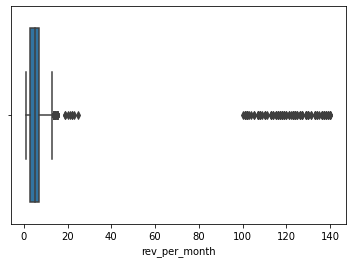

In [78]:
#USING BOX PLOT
import matplotlib.pyplot as plt
sns.boxplot(df1['rev_per_month'])

In [79]:
df_rev_per_month=df1['rev_per_month'].dropna()

In [80]:
Q1_rev_per_month = np.percentile(df_rev_per_month, 25,
                   interpolation = 'midpoint')
 
Q3_rev_per_month = np.percentile(df_rev_per_month, 75,
                   interpolation = 'midpoint')
IQR_rev_per_month = Q3_rev_per_month - Q1_rev_per_month

In [81]:
IQR_rev_per_month

4.0

In [82]:
#Upper Bound
upper_rev_per_month = (Q3_rev_per_month+1.5*IQR_rev_per_month)
upper_rev_per_month

13.0

In [83]:
#Lower Bound
lower_rev_per_month = (Q1_rev_per_month-1.5*IQR_rev_per_month)
lower_rev_per_month

-3.0

## rev_growth_yoy

/Users/skbadu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rev_growth_yoy'>

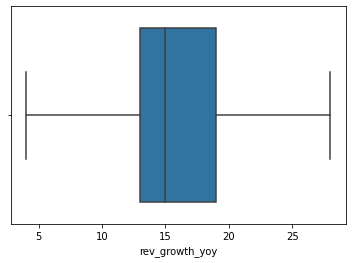

In [84]:
#USING BOX PLOT
import matplotlib.pyplot as plt
sns.boxplot(df1['rev_growth_yoy'])

In [85]:
df_rev_growth_yoy=df1['rev_growth_yoy'].dropna()

In [86]:
Q1_rev_growth_yoy = np.percentile(df_rev_growth_yoy, 25,
                   interpolation = 'midpoint')
 
Q3_rev_growth_yoy = np.percentile(df_rev_growth_yoy, 75,
                   interpolation = 'midpoint')
IQR_rev_growth_yoy = Q3_rev_growth_yoy - Q1_rev_growth_yoy

In [87]:
IQR_rev_growth_yoy

6.0

In [88]:
#Upper Bound
upper_rev_growth_yoy = (Q3_rev_growth_yoy+1.5*IQR_rev_growth_yoy)
upper_rev_growth_yoy

28.0

In [89]:
#Lower Bound
lower_rev_growth_yoy = (Q1_rev_growth_yoy-1.5*IQR_rev_growth_yoy)
lower_rev_growth_yoy

4.0

## coupon user payment

/Users/skbadu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coupon_used_for_payment'>

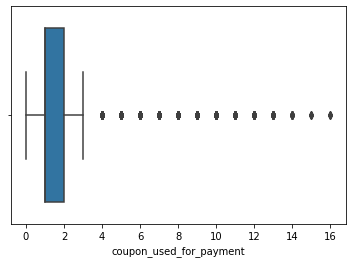

In [90]:
#USING BOX PLOT
import matplotlib.pyplot as plt
sns.boxplot(df1['coupon_used_for_payment'])

In [91]:
df_coupon_used_for_payment=df1['coupon_used_for_payment'].dropna()


Q1_coupon_used_for_payment = np.percentile(df_coupon_used_for_payment, 25,
                   interpolation = 'midpoint')
 
Q3_coupon_used_for_payment = np.percentile(df_coupon_used_for_payment, 75,
                   interpolation = 'midpoint')
IQR_coupon_used_for_payment = Q3_coupon_used_for_payment - Q1_coupon_used_for_payment

In [92]:
IQR_coupon_used_for_payment

1.0

In [93]:
#Upper Bound
upper_coupon_used_for_payment = (Q3_coupon_used_for_payment+1.5*IQR_coupon_used_for_payment)
upper_coupon_used_for_payment

3.5

In [94]:
#Lower Bound
lower_coupon_used_for_payment = (Q1_coupon_used_for_payment-1.5*IQR_coupon_used_for_payment)
lower_coupon_used_for_payment

-0.5

## Day_Since_CC_Connect

/Users/skbadu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day_Since_CC_connect'>

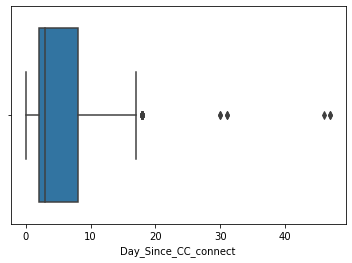

In [95]:
#USING BOX PLOT
import matplotlib.pyplot as plt
sns.boxplot(df1['Day_Since_CC_connect'])

In [96]:
df_Day_Since_CC_connect=df1['Day_Since_CC_connect'].dropna()


Q1_Day_Since_CC_connect = np.percentile(df_Day_Since_CC_connect, 25,
                   interpolation = 'midpoint')
 
Q3_Day_Since_CC_connect = np.percentile(df_Day_Since_CC_connect, 75,
                   interpolation = 'midpoint')
IQR_Day_Since_CC_connect = Q3_Day_Since_CC_connect - Q1_Day_Since_CC_connect

In [97]:
IQR_Day_Since_CC_connect

6.0

In [98]:
#Upper Bound
upper_Day_Since_CC_connect = (Q3_Day_Since_CC_connect+1.5*IQR_Day_Since_CC_connect)
upper_Day_Since_CC_connect

17.0

In [99]:
#Lower Bound
lower_Day_Since_CC_connect = (Q1_Day_Since_CC_connect-1.5*IQR_Day_Since_CC_connect)
lower_Day_Since_CC_connect

-7.0

## cashback

/Users/skbadu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cashback'>

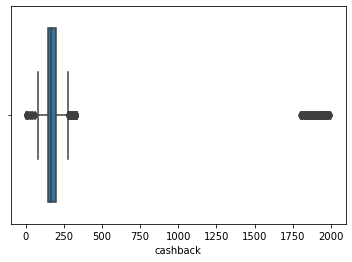

In [100]:
#USING BOX PLOT
import matplotlib.pyplot as plt
sns.boxplot(df1['cashback'])


In [101]:
df_cashback=df1['cashback'].dropna()

Q1_cashback = np.percentile(df_cashback, 25,
                   interpolation = 'midpoint')
 
Q3_cashback = np.percentile(df_cashback, 75,
                   interpolation = 'midpoint')
IQR_cashback = Q3_cashback - Q1_cashback
IQR_cashback

52.79999999999998

In [102]:
#Upper Bound
upper_cashback = (Q3_cashback+1.5*IQR_cashback)
upper_cashback

279.21

In [103]:
#Lower Bound
lower_cashback = (Q1_cashback-1.5*IQR_cashback)
lower_cashback

68.01000000000003

In [104]:
df_outliers=pd.DataFrame({'Tenure_lower_bound' : lower_tenure,
                          'Tenure_upper_bound' : upper_tenure,
                           'CC_Contacted_LY_lower_bound' : lower_CC_Contacted_LY,
                            'CC_Contacted_LY_upper_bound' : upper_CC_Contacted_LY,
                           'rev_per_month_lower_bound' : lower_rev_per_month,
                           'rev_per_month_upper_bound' : upper_rev_per_month,
                         'rev_growth_yoy_lower_bound' : lower_rev_growth_yoy,
                         'rev_growth_yoy_upper_bound' : upper_rev_growth_yoy,
                         'coupon_used_for_payment_lower_bound' : lower_coupon_used_for_payment,
                         'coupon_used_for_payment_upper_bound' : upper_coupon_used_for_payment,
                         'Day_Since_CC_connect_lower_bound' : lower_Day_Since_CC_connect,
                         'Day_Since_CC_connect_upper_bound' : upper_Day_Since_CC_connect,
                         'cashback_lower_bound' : lower_cashback,
                         'cashback_upper_bound' : upper_cashback,
                         },
                          index=['values'])

In [105]:
df_outliers

,Tenure_lower_bound,Tenure_upper_bound,CC_Contacted_LY_lower_bound,CC_Contacted_LY_upper_bound,rev_per_month_lower_bound,rev_per_month_upper_bound,rev_growth_yoy_lower_bound,rev_growth_yoy_upper_bound,coupon_used_for_payment_lower_bound,coupon_used_for_payment_upper_bound,Day_Since_CC_connect_lower_bound,Day_Since_CC_connect_upper_bound,cashback_lower_bound,cashback_upper_bound
values,-19.0,37.0,-7.0,41.0,-3.0,13.0,4.0,28.0,-0.5,3.5,-7.0,17.0,68.01,279.21


In [106]:
df_outliers.to_excel("/Users/skbadu/OneDrive/epgm/capstone/data/outliers.xlsx")

In [107]:
# Quantile Based Flooring and Capping
#if outlier more than upper quantile replace with upper quantile values
#if outlier less than lower quantile replace with lower quantile valuea
for i in range (0,len(df1)):
    df['Tenure'][i] = np.where((df['Tenure'][i] > upper_tenure),upper_tenure,df['Tenure'][i])
    df['CC_Contacted_LY'][i] = np.where((df['CC_Contacted_LY'][i] > upper_CC_Contacted_LY),upper_CC_Contacted_LY,df['CC_Contacted_LY'][i])
    df['rev_per_month'][i] = np.where((df['rev_per_month'][i] > upper_rev_per_month),upper_rev_per_month,df['rev_per_month'][i])
    df['coupon_used_for_payment'][i] = np.where((df['coupon_used_for_payment'][i] > upper_coupon_used_for_payment),upper_coupon_used_for_payment,df['coupon_used_for_payment'][i])
    df['Day_Since_CC_connect'][i] = np.where((df['Day_Since_CC_connect'][i] > upper_Day_Since_CC_connect),upper_Day_Since_CC_connect,df['Day_Since_CC_connect'][i])
    df['cashback'][i] = np.where((df['cashback'][i] > upper_cashback),upper_cashback,df['cashback'][i])
    df['Tenure'][i] = np.where((df['Tenure'][i] < lower_tenure),lower_tenure,df1['Tenure'][i])
    df['CC_Contacted_LY'][i] = np.where((df['CC_Contacted_LY'][i] < lower_CC_Contacted_LY),lower_CC_Contacted_LY,df['CC_Contacted_LY'][i])
    df['rev_per_month'][i] = np.where((df['rev_per_month'][i] < lower_rev_per_month),lower_rev_per_month,df['rev_per_month'][i])
    df['coupon_used_for_payment'][i] = np.where((df['coupon_used_for_payment'][i] < lower_coupon_used_for_payment),lower_coupon_used_for_payment,df['coupon_used_for_payment'][i])
    df['Day_Since_CC_connect'][i] = np.where((df['Day_Since_CC_connect'][i] < lower_Day_Since_CC_connect),lower_Day_Since_CC_connect,df['Day_Since_CC_connect'][i])
    df['cashback'][i] = np.where((df['cashback'][i] < lower_cashback),lower_cashback,df['cashback'][i])
    df['rev_growth_yoy'][i] = np.where((df['rev_growth_yoy'][i] < lower_rev_growth_yoy),lower_rev_growth_yoy,df['rev_growth_yoy'][i])
    df['rev_growth_yoy'][i] = np.where((df['rev_growth_yoy'][i] > upper_rev_growth_yoy),upper_rev_growth_yoy,df['rev_growth_yoy'][i])
    i=i+1

/var/folders/xy/yq1cg5r97316z7jc5qnlfyrm0000gn/T/ipykernel_1317/3018451761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tenure'][i] = np.where((df['Tenure'][i] > upper_tenure),upper_tenure,df['Tenure'][i])
/var/folders/xy/yq1cg5r97316z7jc5qnlfyrm0000gn/T/ipykernel_1317/3018451761.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CC_Contacted_LY'][i] = np.where((df['CC_Contacted_LY'][i] > upper_CC_Contacted_LY),upper_CC_Contacted_LY,df['CC_Contacted_LY'][i])
/var/folders/xy/yq1cg5r97316z7jc5qnlfyrm0000gn/T/ipykernel_1317/3018451761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

# KNN Method to handle missing values

In [108]:
from sklearn.impute import KNNImputer

In [109]:
df.head(
)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [110]:
# convert categorical to numerical
cat_variables = df[['Payment', 'Gender', 'account_segment','Marital_Status','Login_device']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile
0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,0,0,0,1,1,0,1,0,0,0,1,0,1
2,0,1,0,0,1,0,1,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,1,0,1
4,1,0,0,0,1,0,1,0,0,0,1,0,1


In [114]:
# concatenate converted into original and delete the original categorical
df = df.drop(['Payment', 'Gender', 'account_segment','Marital_Status','Login_device'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
#df1 = pd.concat([df, cat_dummies], axis=1)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,0,0,0,0,1,0,0,1,0,1
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,1,1,0,1,0,0,0,1,0,1
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0,1,0,1,0,0,0,1,0,1
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0,1,0,0,1,0,0,1,0,1
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,...,0,1,0,1,0,0,0,1,0,1


In [112]:
# used for checking if all columns have been taken care of or not
#df.to_excel("/Users/skbadu/OneDrive/epgm/capstone/data/output_knn1.xlsx")

In [115]:
#normalized the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile
0,0.000000,1.0,0.040404,1.0,0.054054,0.6,0.4,0.25,0.666667,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.000089,1.0,0.000000,0.0,0.108108,0.6,0.6,0.50,0.500000,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.000178,1.0,0.000000,0.0,0.702703,0.4,0.6,0.50,0.416667,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000266,1.0,0.000000,1.0,0.297297,0.4,0.6,1.00,0.583333,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.000355,1.0,0.000000,0.0,0.216216,0.4,0.4,1.00,0.166667,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [116]:
# used KNN method to replace missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [117]:
df.isnull().sum()

AccountID                       0
Churn                           0
Tenure                          0
City_Tier                       0
CC_Contacted_LY                 0
Service_Score                   0
Account_user_count              0
CC_Agent_Score                  0
rev_per_month                   0
Complain_ly                     0
rev_growth_yoy                  0
coupon_used_for_payment         0
Day_Since_CC_connect            0
cashback                        0
Payment_Credit Card             0
Payment_Debit Card              0
Payment_E wallet                0
Payment_UPI                     0
Gender_Male                     0
account_segment_Regular         0
account_segment_Regular Plus    0
account_segment_Super           0
account_segment_Super Plus      0
Marital_Status_Married          0
Marital_Status_Single           0
Login_device_Computer           0
Login_device_Mobile             0
Payment_Credit Card             0
Payment_Debit Card              0
Payment_E wall

In [ ]:
df.to_excel("/Users/skbadu/OneDrive/epgm/capstone/data/output_knn.xlsx")